#Numpy et Array

La bibliothèque NumPy (http://www.numpy.org/) permet d’effectuer des calculs numériques avec Python. Elle introduit une gestion facilitée des tableaux de nombres.

Il faut au départ importer le package numpy avec l’instruction suivante :

In [2]:
import numpy as np

Les tableaux - numpy.array()

Les tableaux  peuvent être créés avec numpy.array(). On utilise des crochets pour délimiter les listes d’éléments dans les tableaux.



In [3]:
a = np.array([[1, 2, 3], [4, 5, 6]])

Accès aux éléments d’un tableau :

In [6]:
print(a[0,1])

2


La fonction numpy.arange() permet de créer des listes en fonction de certain parametres:

In [2]:
import numpy as np
m = np.arange(3, 15, 2)
print(m)

[ 3  5  7  9 11 13]


La fonction numpy.linspace() permet d’obtenir un tableau 1D allant d’une valeur de départ à une valeur de fin avec un nombre donné d’éléments.

In [ ]:
np.linspace(3, 9, 10)

Pour toutes les fonctions que propose numpy, vous pouvez consulter la documentation : https://numpy.org/doc/

Le typage faible et dynamique et les limites du language interperté fait de python une solution lente pour traiter les tableaux de grande taille. 
Dans beaucoup de cas, Numpy fournit une interface pour les opérations standard qui n'implique que des données du même type. Par exemple, on peut calculer les inverses de tous les éléments d'un tableau Numpy :

In [8]:
tableau_large = np.random.randint(1, 100, size=1000000)
tableau_large = 1.0 / tableau_large

Ex 1 :  théorème des valeurs intermédiaires

1. Rappel
Soit f  une fonction continue définie sur un intervalle I et, a et b deux réels de I.Pour tout réel k compris entre f(a) et f(b), il existe au moins un réel c compris entre a et b tel que f(c)=k.

Soit f une fonction continue et strictement monotone sur un intervalle [a;b].Pour tout nombre k compris entre f(a) et f(b), l'équation f(x)=kadmet une unique solution dans l'intervalle [a;b].

2. Application
Nous considérons dans cet exercice la fonction:fdéfinie sur l'intervalle [0;1], par: f(x)=x^3+2x−2
Par la conséquence du théorème des valeurs intermédiaires :  l'équation f(x)=0 admet une unique solution x_0 dans [0;1]
* vérifier continuité et stricte monotonie de f sur [0;1]
* Pour savoir si x0 se trouve dans [0;0,5]ou dans [0,5;1], il faut vérifier si f(0) et f(0,5)  sont de mêmes signes
* proposer un algorithme de recherche pour évaluer x_0 en fonction de $N$, donner par l'utilisateur


x0 compris entre [0.7709169969893992, 0.7709169971058145]


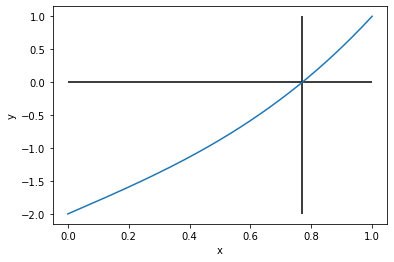

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# 2)

# f : [0,1] -> R
#         x |-> x^3 + 2x -2
def f(x):
    return (x**3 + 2*x - 2)

x = np.linspace(0, 1, 1000)
plt.plot(x, f(x))
plt.xlabel("x")
plt.ylabel("y")
plt.hlines(0, 0, 1)


# 3)

# f'(x) = 3*x^2 + 2 > 0 donc f strictement croissante sur [0, 1]
# de plus f continue sur [0,1] comme addition de fct continue

# 4)

def meme_signe():
    return f(0)*f(0.5) > 0

meme_signe() #True => x0 dans [0.5, 1]

def recherche_x0(N):
    a = 0
    b = 1
    x0 = (a+b)/2
    while (b-a) > 2*N:
        x0 = (a+b)/2
        if f(a)*f(x0) > 0:
            a = x0
        else:
            b = x0
    return (a,b)

a, b = recherche_x0(1E-10);

print("x0 compris entre [",a, ", ", b, "]", sep="")

plt.vlines((a+b)/2, -2, 1)
plt.show()



Ex 2: Carrés magiques
Un carré magique est un tableau carré de taille n×n qui contient tous les entiers de 1 à n^2 et qui vérifie que : la somme de chaque ligne, la somme de chaque colonne, la somme de la diagonale principale et la somme de l’anti-diagonale ont toutes la même valeur.

Pour un carré magique de taille n×n, la valeur de la somme est : S_n=n(n^2+1)/2

1. Définir un tableau pour chacun des exemples 3×3 et 4×4
2. Définir une fonction est_carre_magique(carre)qui teste si un tableau donné est (ou pas) un carré magique
3. Génèrer de façon aléatoire des carrés contenant les entiers de 1 à n^2 grâce à une fonction carre_aleatoire(n). 
4. Définir la probabilité d'obtenir un carrée magique
5. Définir une fonction addition_carre(carre,k)qui ajoute un entier k à tous les éléments du carré.


In [6]:
import numpy as np

# 1)
carre_3x3 = np.array([[6, 1, 8], [7, 5, 3], [2, 9, 4]])
carre_4x4 = np.array([[16, 3, 2, 13], [10, 8, 11 , 5], [7, 9, 6, 12], [1, 14, 15, 4]])


# 2)
def somme_ligne(tab, i, taille):
    somme = 0
    for j in range(taille):
        somme += tab[i, j]
    return somme

def somme_colonne(tab, j, taille):
    somme = 0
    for i in range(taille):
        somme += tab[i, j]
    return somme

def somme_diagonale_gd(tab, taille):
    somme = 0
    for i in range(taille):
        somme += tab[i,i]
    return somme

def somme_diagonale_dg(tab, taille):
    somme = 0
    i = 0
    for j in range(taille-1, -1, -1):
        # print("(",i,",",j,")"," : ",tab[i,j])
        somme += tab[i, j]
        i += 1
    return somme

def est_carre_magique(tab):
    nb_rows = tab.shape
    dim = tab.ndim
    if (nb_rows[0] != nb_rows[1]) or dim != 2:
        return False
    nb_rows = nb_rows[0]
    somme_carre = int((nb_rows)*((nb_rows)**2 + 1)/2)
    # print(somme_carre)
    diag = somme_diagonale_gd(tab, nb_rows) == somme_carre and somme_diagonale_dg(tab, nb_rows) == somme_carre
    # print(somme_diagonale_gd(tab, dim+1))
    # print(diag)
    ligne = True
    colonne = True
    for i in range(dim):
        ligne = ligne and somme_ligne(tab, i, nb_rows) == somme_carre
        # print("ligne :", ligne)
        colonne = colonne and somme_colonne(tab, i, nb_rows) == somme_carre
        # print("colonne :", colonne)
    return diag and ligne and colonne

est_carre_magique(carre_4x4)
# somme_diagonale_dg(carre_3x3, 3)

def carre_aleatoire(n):
    matrix = np.empty([n, n])
    for i in range(n):
        for j in range(n):
            matrix[i][j] = np.random.randint(1, high = n**2)
    return matrix

matrice = carre_aleatoire(4)
print(matrice)

def addition_carre(carre, k):
    nb_rows = carre.shape[0]
    nb_columns = carre.shape[1]
    add =np.empty([nb_rows, nb_columns])
    add.fill(k)
    return  carre + add

print(addition_carre(carre_3x3, 10))

[[ 4. 12.  4.  2.]
 [12. 13. 10.  8.]
 [ 5.  7.  9. 13.]
 [12.  8.  1. 14.]]
[[16. 11. 18.]
 [17. 15. 13.]
 [12. 19. 14.]]
